# Lab 3 - Visualization

Last update: 01/11/2023

- Name: Trần Đình Nhật Trí
- Student ID: 21120576

***

## Work and submission guidelines

**Work on your assignment**

- You will do your assignment directly in this notebook. First, fill in your name and ID at the beginning of the file. In the notebook, fill in places that say:
```python
#TODO
```

- During your work, you can print out the result, create more cells to test, or create more functions to handle things. Please note that <font color=red>you are not allowed to delete or modify my code cells</font> (except in the case that mentioned above). Remember to remove `raise NotImplementedError("not implement")` when running the code.

- Always press `Ctrl + S` in order to save your work.

**Notes:** 

    *  Copy means zero
    *  You have to submit your work on time. No exception
    *  Any questions about your grade are based on the assignment submitted on Moodle
    *  Wrong submission takes you -2 points

**Submit your work**

- When grading your assignment, I will choose `Kernel` - `Restart Kernel & Run All Cells` in order to restart the kernel and run all cells in your notebook. Therefore, you should do that before submitting to ensure that the outputs are all as expected.

- After that, rename you notebook with your student ID (e.g. `1234567.ipynb`) and submit on Moodle.

- <font color=red>Please strictly follow the submission rules.</font>

## Abstract and general requirements

**Abstract**

- In this assignment, you are required to visualize data and results. This task is very important since it provides reader (your clients, your boss,...) an overview of the data as well as your results.

- You will visualize the data in order to answer some questions. By answering these questions, you are able to get some insights from data.

- You will also visualize the results of machine learning model to be able to know whether your model works well or not.

**General requirements**

- Every charts **must have their own name, axes name, legends**.
- The charts you draw must not only be correct but also beautiful:
    - The correctness is shown in choosing the right chart and accurately calculating the data to draw the chart.
    - The beauty is expressed in the UI/UX of the chart. The beauty of UI is shown in choosing the colors, layout of the chart. The beauty of UX is reflected in the fact that the reader can easily capture your message conveyed through your notebook.

---

In [1]:
# visialize stuff
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import json
# !pip install geopandas
import geopandas

# modeling stuff
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import random

## Data visualization

- In this section, you are going to compute and visualize some information about Covid-19
- The data prepared in `./data` was collected from Worldometer when I was a senior student
- Link: https://www.worldometers.info/coronavirus/

In [2]:
# read the data into a dataframe
df = pd.read_csv('./data/data.csv')
print(f'Shape: {df.shape}')
df.head(5)

Shape: (219, 10)


,Country Name,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Critical Cases,Total Tests,Population
0,USA,"31,990,143",NaN,"576,298",NaN,"24,560,856","6,852,989","9,321","420,822,699","332,516,170"
1,India,"13,689,453","+3,380","171,089",NaN,"12,253,697","1,264,667","8,944","259,207,108","1,390,568,032"
2,Brazil,"13,521,409",NaN,"355,031",NaN,"11,957,068","1,209,310","8,318","28,600,000","213,737,070"
3,France,"5,067,216",NaN,"99,135",NaN,"310,934","4,657,147","5,916","70,140,847","65,386,285"
4,Russia,"4,657,883","+8,173","103,601",338.0,"4,281,776","272,506","2,300","124,100,000","145,983,351"


### Requrement #1: Preprocess

- **TODO**: Take a look at the data files, then go to the URL aforementioned, explore the meaning of columns in the dataset and fill in the blanks:
    - Country Name: ...
    - Total Cases: ...
    - New Cases: ...
    - Total Deaths: ...
    - New Deaths: ...
    - Total Recovered: ...
    - Active Cases: ...
    - Critical Cases: ...
    - Total Tests: ...
    - Population: ...
 
- Check the data with `info()` function

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     219 non-null    object 
 1   Total Cases      219 non-null    object 
 2   New Cases        46 non-null     object 
 3   Total Deaths     219 non-null    object 
 4   New Deaths       32 non-null     float64
 5   Total Recovered  217 non-null    object 
 6   Active Cases     217 non-null    object 
 7   Critical Cases   146 non-null    object 
 8   Total Tests      210 non-null    object 
 9   Population       219 non-null    object 
dtypes: float64(1), object(9)
memory usage: 17.2+ KB


- You can see that `New Cases`, `New Deaths`, `Critical Cases` have a lot of missing data (at least 33.3%). Therefore, we have to remove these columns.
- Most of data in columns are `object` type, which are not suitable at all. They should be converted to integer.
- `Total Recovered`, `Active Cases` and `Total Tests` only have a few missing values, so we can fill in these missing values with median value of each column.

In [4]:
# TODO: drop New Cases, New Deaths, Critical Cases
df = df.drop(['New Cases', 'New Deaths', 'Critical Cases'], axis=1)
# check the result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country Name     219 non-null    object
 1   Total Cases      219 non-null    object
 2   Total Deaths     219 non-null    object
 3   Total Recovered  217 non-null    object
 4   Active Cases     217 non-null    object
 5   Total Tests      210 non-null    object
 6   Population       219 non-null    object
dtypes: object(7)
memory usage: 12.1+ KB


In [5]:
# # TODO: convert data to integer. if the converter returns error, leave it a None
features = ['Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases', 'Total Tests', 'Population']
# Define a custom function to convert string to int and handle empty cells
def convert_to_int_or_none(value):
    if pd.isna(value) or value == '' or value == ' ':
        return None
    else:
        return int(value.replace(',', ''))

for i in features:
    df[i] = df[i].apply(convert_to_int_or_none)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     219 non-null    object 
 1   Total Cases      219 non-null    int64  
 2   Total Deaths     204 non-null    float64
 3   Total Recovered  217 non-null    float64
 4   Active Cases     217 non-null    float64
 5   Total Tests      210 non-null    float64
 6   Population       219 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 12.1+ KB


**TODO**: We did handle missing value before. Why do we still have missing values here?

- We have just dropped the high percentage missing value features (New Cases, New Deaths, Critical Cases), we have not handled the other features yet.
- We need to fill features which have less percentage of missing value.

In [6]:
# TODO: fill in the missing data with median value
df[features] = df[features].fillna(df[features].median())
# check the result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     219 non-null    object 
 1   Total Cases      219 non-null    int64  
 2   Total Deaths     219 non-null    float64
 3   Total Recovered  219 non-null    float64
 4   Active Cases     219 non-null    float64
 5   Total Tests      219 non-null    float64
 6   Population       219 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 12.1+ KB


**TODO**: Why do we have `float64` here?
- **IEEE 754** specifies `nan` as a float value.
- In pandas, `None` is also treated as a missing value. `None` is converted to `nan` when a DataFrame or Series containing None is created, or `None` is assigned to an element.
- Since `nan` is a floating-point number float, if `None` is converted to `nan`, the data type dtype of the column is changed to float, even if the other values are integers `int`.
- Follow the *IEEE 754* standard, `nan` is represented as a `float64`, which provides higher precision compared to `float32`. The extra precision in `float64` allows for more accurate representation of a wide range of values, which can be crucial in scientific and engineering applications where precision is important.

In [7]:
# TODO: save your new data frame to `./data/new_data.csv`
df.to_csv('./data/new_data.csv', index=False)

In [8]:
# TEST
file = open('./data/new_data.csv', 'r')
new_data = file.read()
file.close()

file = open('./data/correct_data.csv', 'r')
correct_data = file.read()
file.close()

assert new_data == correct_data

### Requirement #2: Visualize single variable

- For now, if you do not pass the test, you have to work on the correct file by un-commenting the cell code below to read the `./data/correct_data.csv` into `df`
- You are going to draw 6 bar charts which show all the fields of dataset. For each bar chart, sort the values of countries in descending order and only visualize 5 countries

In [9]:
# # un-comment these lines of code
# df = pd.read_csv('./data/correct_data.csv')

df.head()

,Country Name,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Tests,Population
0,USA,31990143,576298.0,24560856.0,6852989.0,420822699.0,332516170
1,India,13689453,171089.0,12253697.0,1264667.0,259207108.0,1390568032
2,Brazil,13521409,355031.0,11957068.0,1209310.0,28600000.0,213737070
3,France,5067216,99135.0,310934.0,4657147.0,70140847.0,65386285
4,Russia,4657883,103601.0,4281776.0,272506.0,124100000.0,145983351


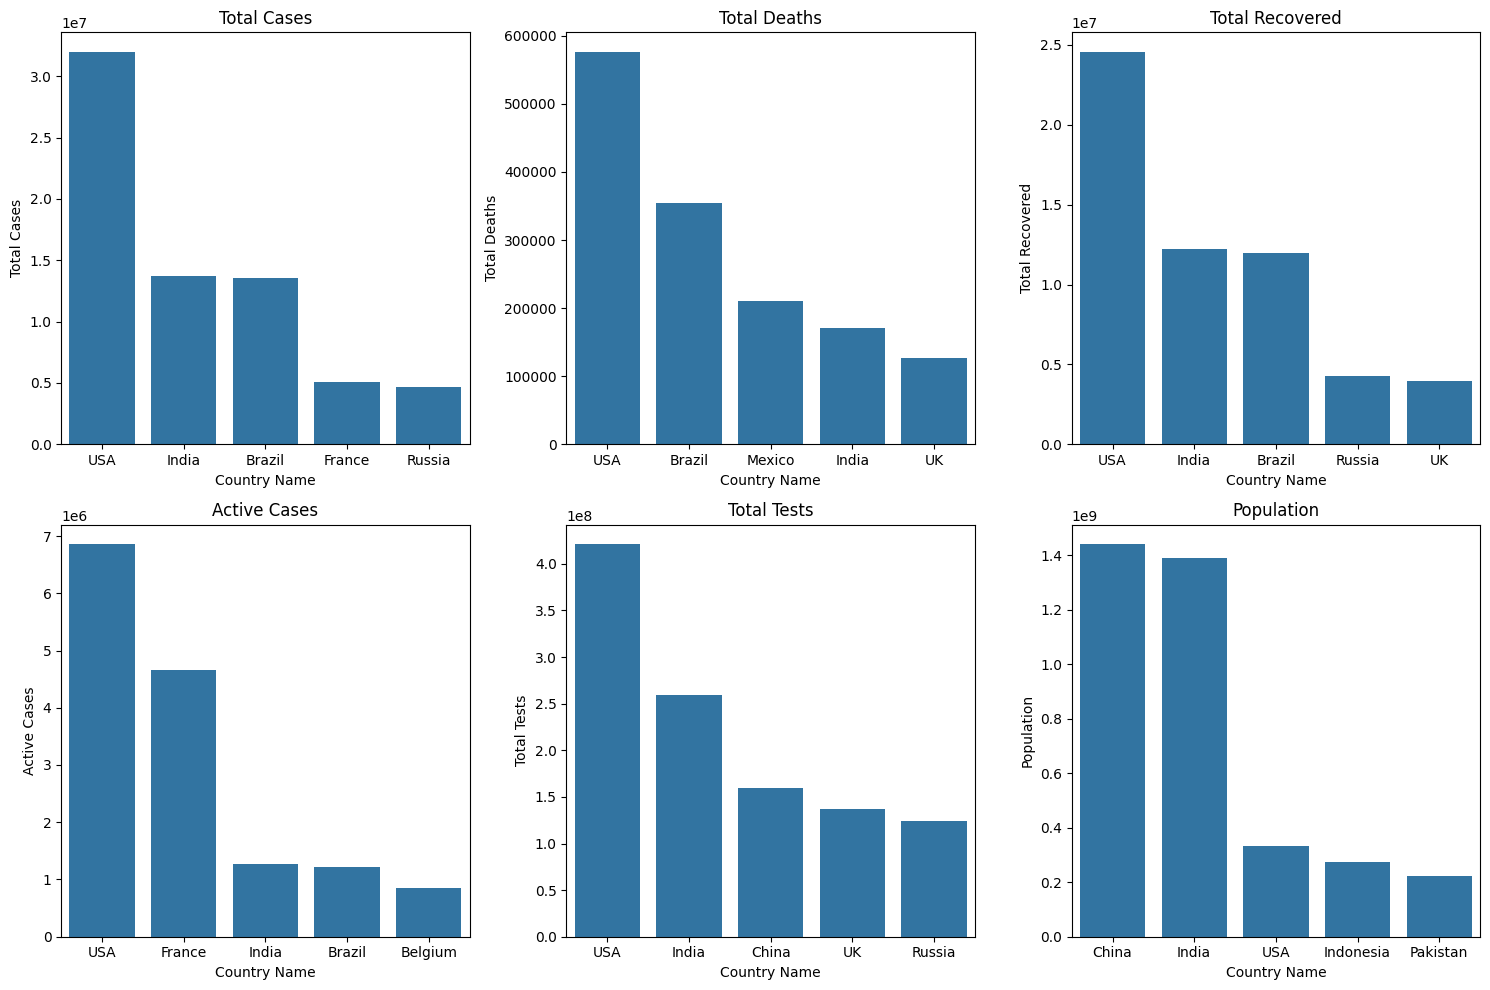

In [10]:
# TODO: draw 6 bar charts
# create 6 subplots for each feature
fig, ax2 = plt.subplots(2, 3, figsize = (15, 10))
# get numeric features
numeric_features = df.select_dtypes(include='number')
# sort each feature in descending order
total_cases = df.sort_values('Total Cases',ascending = False).head(5)
total_deaths=df.sort_values('Total Deaths',ascending = False).head(5)
total_recovered=df.sort_values('Total Recovered',ascending = False).head(5)
active_cases=df.sort_values('Active Cases',ascending = False).head(5)
total_tests=df.sort_values('Total Tests',ascending = False).head(5)
population=df.sort_values('Population', ascending = False).head(5)

# plot bar chart with seaborn
sn.barplot(data=total_cases, x="Country Name", y="Total Cases", ax=ax2[0, 0], order=total_cases['Country Name'])
ax2[0, 0].set_title("Total Cases")
sn.barplot(total_deaths, x="Country Name", y="Total Deaths", ax=ax2[0, 1], order=total_deaths['Country Name'])
ax2[0, 1].set_title("Total Deaths")
sn.barplot(total_recovered, x="Country Name", y="Total Recovered", ax=ax2[0, 2], order=total_recovered['Country Name'])
ax2[0, 2].set_title("Total Recovered")
sn.barplot(active_cases, x="Country Name", y="Active Cases", ax=ax2[1, 0], order=active_cases['Country Name'])
ax2[1, 0].set_title("Active Cases")
sn.barplot(total_tests, x="Country Name", y="Total Tests", ax=ax2[1, 1], order=total_tests['Country Name'])
ax2[1, 1].set_title("Total Tests")
sn.barplot(population, x="Country Name", y="Population", ax=ax2[1, 2], order=population['Country Name'])
ax2[1, 2].set_title("Population")

fig.tight_layout()
plt.show()

**TODO**: Comment about the chart

- **USA** took the leading position at 5 charts: `Total Cases`, `Total Deaths`, `Total Recovered`, `Active Cases` and `Total Tests` while top 1 of `Population` belonged to **China.**
- The skew between top 1 and top 2 was very big. Like `Total Cases` and `Total Recovered`, **USA** was higher than a half of the rest in chart.
- In `Population`, **China** and **India** had a huge impact of World Population, both are roughly 1,4 billion people, whereas **USA**, **Indonesia** and **Pakistan** could not reach to 400 millions people.

### Requirement #3: Draw world map

- Using bar chart just gives you a little bit information about numbers
- In this requirement, you are going to draw a world map with circles which show the number of cases for each country. Specifically, you are provided a file named `coord.csv` that contains longitude and latitude of each country. You are going to use `Total cases` and `Total Death` to draw the following charts

/tmp/ipykernel_119/1263562093.py:13: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


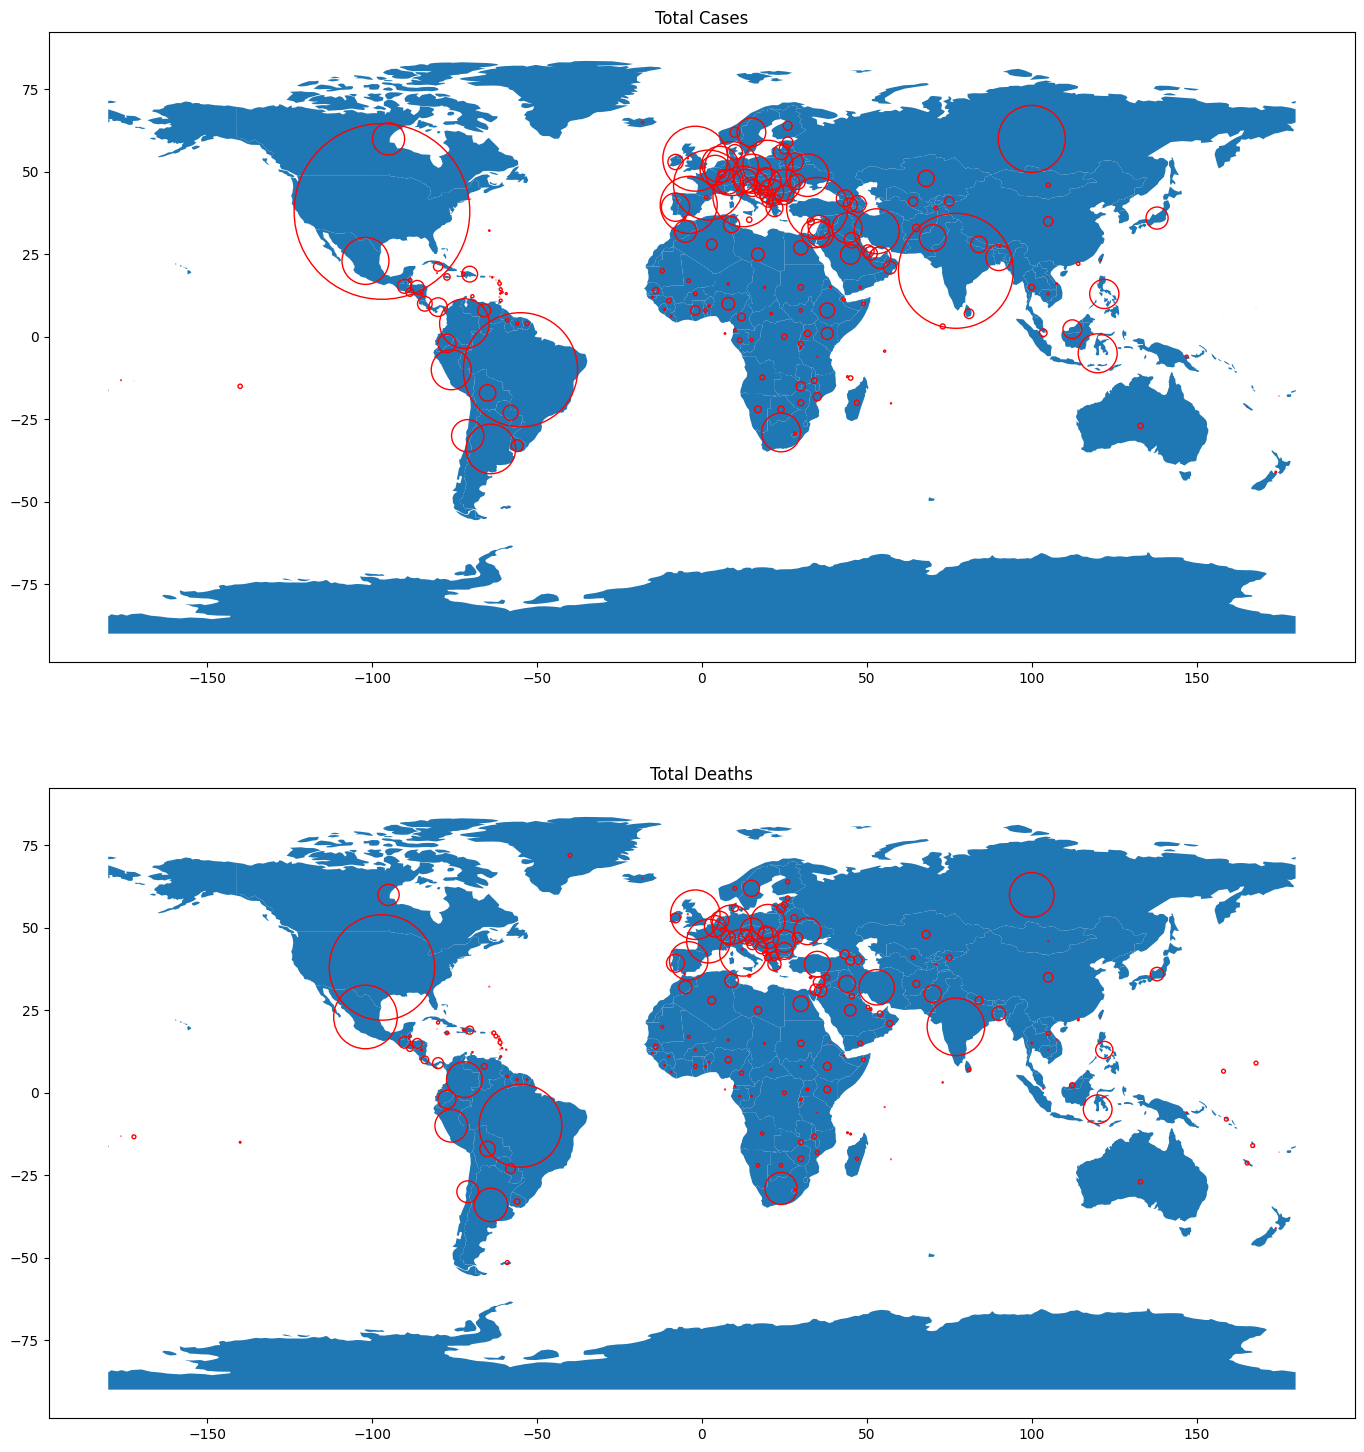

In [11]:
# TODO: draw 2 world map chart using geopandas
# Reading JSON data from a file
from shapely.geometry import Point
with open('./data/coord.json', 'r') as j:
     data = json.loads(j.read())
data

# Convert the data to a GeoDataFrame
geometry = [Point(lon, lat) for lat, lon in zip(data['lat'].values(), data['long'].values())]
stats = df.set_index('Country Name')
gdf = geopandas.GeoDataFrame(stats, geometry=geometry, index=data['lat'].keys())

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# Plot the GeoDataFrame 
# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(20, 18))
# Plot the world map for Total Cases
world.plot(ax=axes[0])
axes[0].set_title('Total Cases')

# Plot the world map for Total Deaths
world.plot(ax=axes[1])
axes[1].set_title('Total Deaths')

# plot data onto world map
gdf.plot(markersize=gdf['Total Cases']*0.0005, ax=axes[0], color='none', edgecolor='red', marker='o', legend=True)
gdf.plot(markersize=gdf['Total Deaths']*0.01, ax=axes[1], color='none', edgecolor='red', marker='o', legend=True)

# Show plot
plt.show()

**TODO**: Comment about the chart

- In the `Total Cases` world map, we could see that the biggest red circle was plotted on the **America** coordinate, which means **America** has the highest number of cases in the world, while India stood right behind. Other high cases are scattered at **Europe** countries and **South America**.
- `Total Deaths` world map, the highest number of deaths was still belong to **America**, the secondary is **Africa**.

### Requirement #4: Relationship between 2 variables

- Exploring the relationship between variables is a needed task to do
- You will start with exploring the linear relationship between 2 variables. In order to do so, draw $C_6^2=15$ scatter plots. For each plot, draw a line that shows the linear relationship of variables. You should implement the line yourself instead of using library.

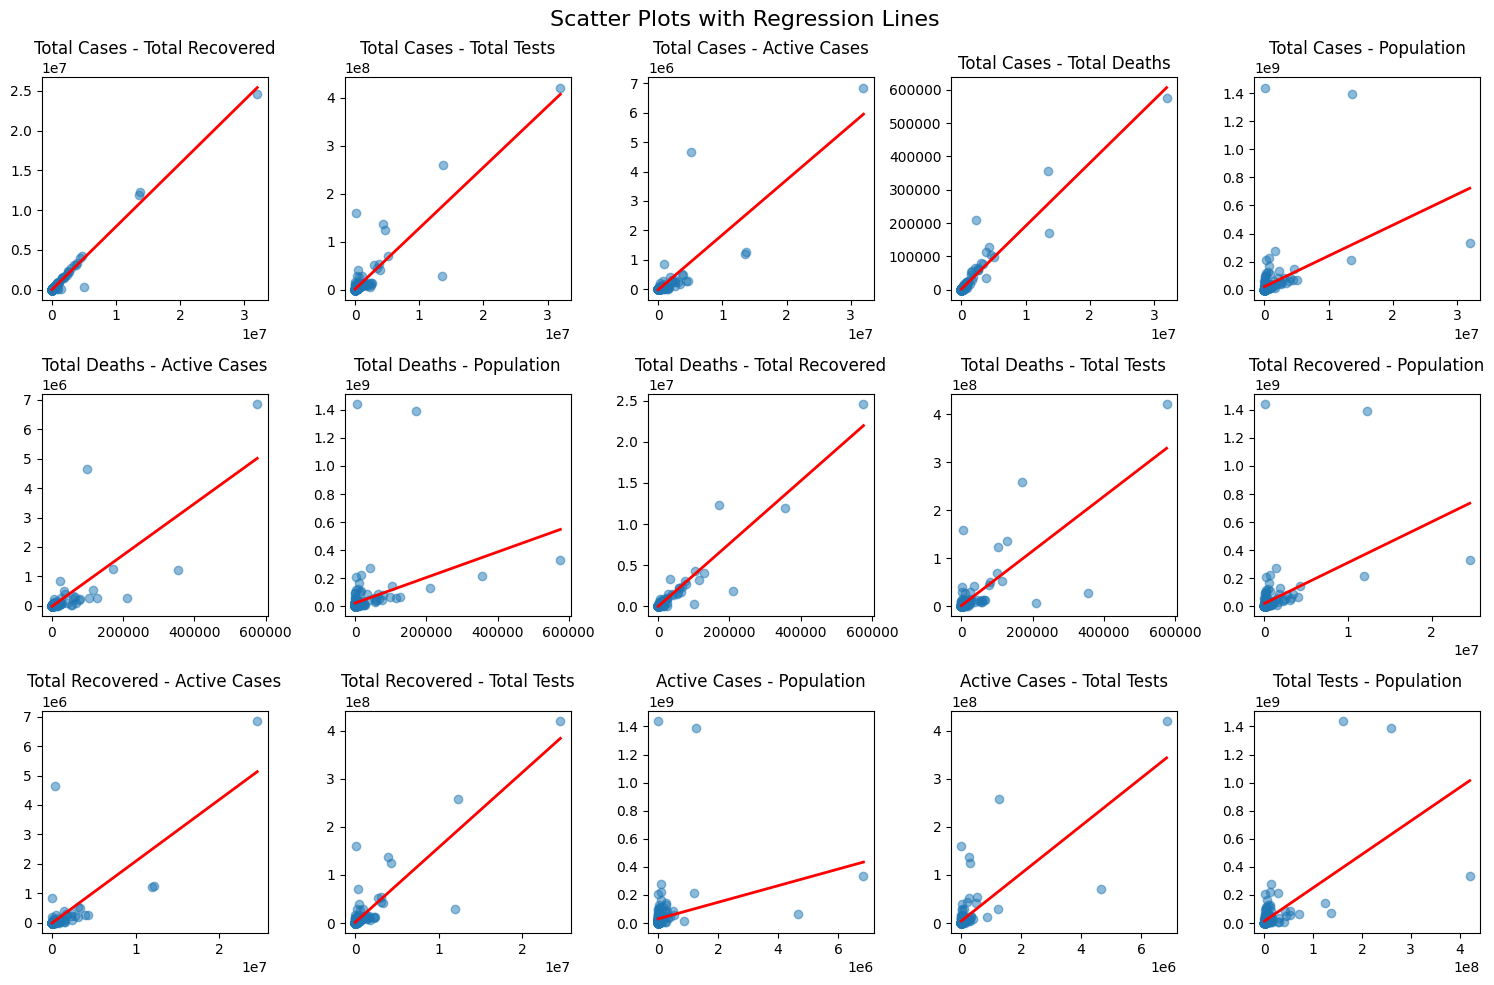

In [12]:
# TODO: scatter stuff
# Calculate the slope (m) and y-intercept (b) for the regression line
def calculate_regression_line(x, y):
    n = len(x)
    m = (n * np.sum(x * y) - np.sum(x) * np.sum(y)) / (n * np.sum(x**2) - (np.sum(x))**2)
    b = (np.sum(y) - m * np.sum(x)) / n
    return m, b

col = df.select_dtypes(include='number')

count = 0
# Plot the scatter plots and regression lines
fig, axs = plt.subplots(3, 5, figsize=(15, 10))
i_1 = 0
j_1 = 0
temp = []

fig.suptitle('Scatter Plots with Regression Lines', fontsize=16)

for val in (col.columns):
    temp.append(val)
    for val2 in (list(set(col.columns) - set(temp))):
        count = count + 1
        if count <= 15:
            # Scatter plot
            axs[i_1, j_1].scatter(df[val], df[val2], alpha=0.5)
            # Calculate the regression line
            m, b = calculate_regression_line(df[val], df[val2])

            # Plot the regression line
            x_line = np.linspace(min(df[val]), max(df[val]), 100)
            y_line = m * x_line + b
            
            axs[i_1, j_1].plot(x_line, y_line, color='red', linewidth=2)
            axs[i_1, j_1].set_title(f'{val} - {val2}')
            
            # subplot index check to plot data
            j_1 = (j_1 + 1) if j_1 + 1 <= 4 else 0
            i_1 = i_1 + 1 if j_1 == 0 else i_1
            
fig.tight_layout()
plt.show()

**TODO**: As showed above, give your prediction about the relationship between each pair.

- The correlation of all relationships have positive direction and linear relationship.
- With:
    - *Strong correlation*: the points distribution of these pair closed to the regression line and the slope upwards like **y=x** graph.
    - *Moderate correlation*: has a small distance of points to the regression line, and the slope is slightly downwards.
    - *Weak correlation*: some point far away from the regression line and the regression line is almost horizontal.
- Consider each variable against other variables:
    - `Total Cases` has:
        - Strong correlation with `Total Recovered`, `Total Tests` and `Total Deaths`
        - Moderate correlation with `Active Cases`
        - Weak correlation with `Population`
    - `Total Deaths` has:
        - Strong correlation with `Total Recovered`
        - Moderate correlation with `Active Cases` and `Total Tests`
        - Weak correlation with `Population`
    - `Total Recovered` has:
        - Moderate correlation with `Total Tests`
        - Weak correlation with `Population` and `Active Cases`
    - `Active Cases`:
        - Weak correlation with `Population` and `Total Tests`
    - `Total Tests`: Weak correlation with `Population` 

### Requirement #5: Double check the relationship between 2 variables

- In order to make sure about the linear relationship, you have to check each pair with **Pearson correlation coefficient**
- Specifically, $\rho$ is calculated as follows:

$$\rho_{X, Y} = \frac{cov(X, Y)}{\sigma_X \sigma_Y}$$

- Then, plot these 15 values using heatmap

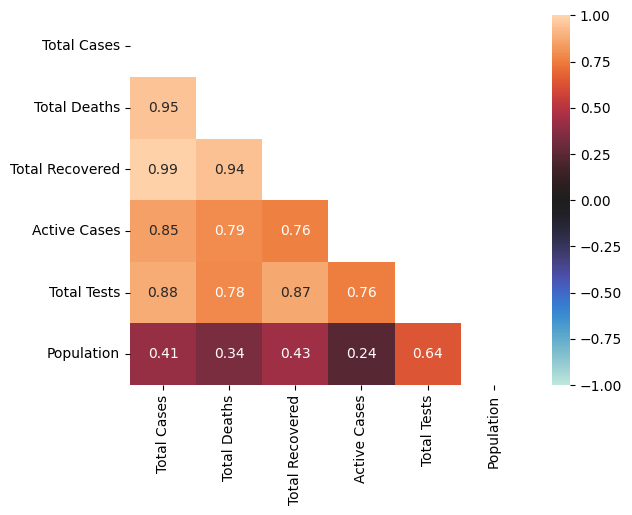

In [13]:
# TODO: create heatamp
# YOUR CODE HERE
df_copy = df.copy()

# drop object dtype features
df_copy = df_copy.drop(['Country Name'], axis='columns')

# calculate correlation matrix
corr_matrix = df_copy.corr(method='pearson')
heatmap_range = (-1, 1)

# create a mask to hide the upper triangle of the correlation matrix.
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
# plot heatmap graph
sn.heatmap(corr_matrix, mask=mask,
            annot=True, center=0,
           vmin=heatmap_range[0], vmax=heatmap_range[1])
plt.show()

For now, you can check whether your prediction is right or wrong!

## Model visualization

- In this section, we are going to visualize the training and testing process of machine learning model
- The process of training and testing a model is as follow:
    1. Prepare data for training and testing
    2. Create a model
    3. Train and test the model
    4. Visualize the result

- You are required to:
    1. Study Multi-layer neural network and Convolutional neural network
    2. Study `Pytorch` in order to prepare data and design machine learning model
    3. Design 2 models to classify MNIST dataset. Then, visualize the result of each model and compare the result to each other
        - Model 1: A fully-connected model with 4 layers. The input layer has $784$ neurons. The hidden layer #1 has $1024$ neurons, which is followed by a $ReLU$ as activation functions. The hidden layer #2 has $512$ neurons, also followed by a $ReLU$ as activation functions. The output layer has $10$ neurons (of course), which follows by a $LogSoftmax$ function
        - Model 2: A CNN model with 2 Convolution layers and 1 linear layer. All the CNN layers have 20 filters, kernel size equal to $5$. Each of them is followed by a $ReLU$ activation function and a MaxPooling2D layer ($kernel\_size=2$). The linear layer is followed by a $LogSoftmax$ activation function

- Google Colab can be used since it provides free GPU, which makes your training and testing process faster

### Requirement #6: Prepare data

- `Pytorch` supports a lot of datasets for running machine learning model. In this lab, we use MNIST dataset. So, download the training set and the testing set using `Pytorch` and store them in `./data`
- Note that you have to transform your data into `tensor` (a datatype that's quite similar to `numpy array`) so you can input to model
- After that, create `train_dataloader` and `test_dataloader`

**TODO**: Explain why we have to create dataloader

We have to create dataloader because:
- With a large dataset, it could have thousands or millions of samples, and with the limitation of computer configuration (CPU, GPU, etc.) it very difficult to handle all samples at once when training or testing the model, that will make a long time-consuming, moreover can freeze the computer that unable to use. Thanks to DataLoader, we can seperate dataset to a list of batch, each batch contain a certain amount of samples for easy to train and test, reducing memory requirements and enabling the use of datasets that may not fit entirely in RAM.
- During training, it is important to present the data to the model in a random order to prevent the model from learning patterns specific to the order of the data. DataLoader typically shuffles the data so that each batch contains a random selection of samples from the dataset.
- Modern hardware, such as GPUs, is optimized for parallel processing. DataLoader can be configured to load and preprocess batches of data in parallel, taking advantage of the parallelization capabilities of hardware and speeding up the training process.
- DataLoader allows to apply various transformations to the data before it is fed into the model. This includes normalization, resizing, and other preprocessing steps that can enhance the model's ability to learn from the data

In [14]:
# TODO: download training, testing data and store them into training_data and testing_data
# Then, create train_dataloader and test_dataloader with batch_size=32

# declare some variables
input_layer = 784
hidden_layer1 = 1024
hidden_layer2 = 512
output_layer = 10
batch_size = 32

# create MIST training_data and testing_data
training_data = datasets.MNIST(root='./data', train=True, transform=ToTensor(), download=True)
testing_data = datasets.MNIST(root='./data', train=False, transform=ToTensor(), download=True)
# get training and testing dataloader
train_dataloader = DataLoader(dataset=training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(dataset=testing_data, batch_size=batch_size, shuffle=False)

- After downloading the data, visualize 10 random samples (2 rows, 5 samples for each row) from training set.

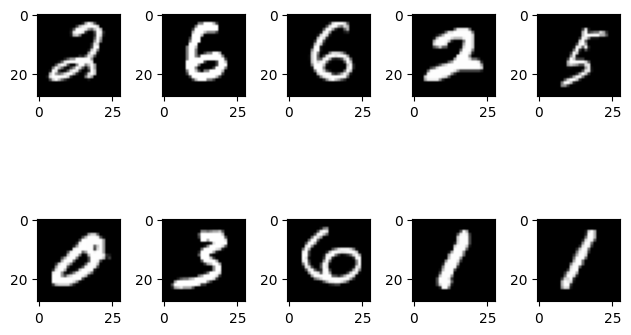

In [15]:
# TODO: visualize 10 random samples
examples = iter(train_dataloader)
print(examples)
samples, labels = next(examples)

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.tight_layout()
plt.show()

### Requirement #7: Create models

- Create 2 models as mentioned above. Call them `Mnist_FC` and `Mnist_CNN`
- **I strongly recommend that you should slowly implement, print out the output and its shape of each layer in order to get a deep understanding of what you are trying to do**
- Before moving to the next requirement, you should test your model with a random sample of the dataset. In case you create code cells for testing, remember to remove these cells

In [16]:
# TODO: create Mnist_FC and Mnist_CNN
# Model 1: Fully-connected model
class FCModel(nn.Module):
    def __init__(self):
        super(FCModel, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(input_layer, hidden_layer1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_layer1, hidden_layer2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_layer2, output_layer)
        self.logsoftmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        out = self.flatten(x)
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        out = self.logsoftmax(out)
        return out

model_fc = FCModel()

# Model 2: CNN model
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, kernel_size=5)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        self.conv2 = nn.Conv2d(20, 20, kernel_size=5)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(20 * 4 * 4, 10)
        self.logsoftmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.maxpool1(out)
        out = self.conv2(out)
        out = self.relu2(out)
        out = self.maxpool2(out)
        out = self.flatten(out)
        out = self.fc(out)
        out = self.logsoftmax(out)
        return out

model_cnn = CNNModel()

### Requirement #8: Train and test models

- Design `train` and `test` function with the parameters provided in the following code cell
    - `train` function trains the model with all the data in training set
    - `test` function tests the model with all data in testing set

- Return the accuracy (e.g. $0.847351$) after training and testing

**TODO**: Explain the parameters of `train` and `test` function. In `test` function, there is a line of code that says `with torch.no_grad()`. Why do we have this line of code?

- In `train` function, we have some parameters:
    - dataloader: pass dataloader to train function for training
    - model: pass specific model (fc model or cnn model) to train function
    - loss_fn: pass loss function to compute the difference between predicted and actual values in a machine learning model -> measures how well the model performed.
    - optimizer: pass optimizer function helps in reducing the overall loss and improving accuracy
- In `test` function:
    - dataloader: pass dataloader to evaluate the model
    - model: pass specific model want to evaluate
- When performing evaluation or inference (testing) and don't need to compute gradients, using `torch.no_grad()` helps to save memory and computational resources by avoiding the storage of unnecessary intermediate values for gradient computation.

In [17]:
# TODO: design train and test function

# check gpu
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f'Using {device} for training and testing')

if torch.cuda.is_available():
    model_fc.cuda()
    model_cnn.cuda()
    
# training model function
def train(dataloader, model, loss_fn, optimizer):
    # set model in training mode
    model.train()
    # variables to calculate accuracy
    correct = 0
    total = 0
    for i, data in enumerate(dataloader):
        # pass data to device and get their inputs and labels
        inputs, labels = data[0].to(device), data[1].to(device)
        # reset the gradients of all optimized torch to ensure that we aren't tracking any unnecessary information when we train our neural network
        optimizer.zero_grad()
        # get output of model
        outputs = model(inputs)
        # calculate the loss function
        loss = loss_fn(outputs, labels)
        # calculate the gradient during the backward pass in the neural network
        loss.backward()
        # optimize step
        optimizer.step()
        # find the maximum values and their indices along dimension 1
        _, predicted = torch.max(outputs, 1)
        # keep track of the total number of examples processed across batches
        total += labels.size(0)
        # calculates the number of correct predictions in the current batch
        correct += (predicted == labels).sum().item()
    # calculate final accuracy base on correct and total value
    accuracy = correct / total
    return accuracy

# testing model function
def test(dataloader, model):
    # set model in evaluation mode:
    model.eval()
    correct = 0
    total = 0
    # turn off gradients computation
    with torch.no_grad():
        for i, data in enumerate(dataloader):
            # pass data to device and get their inputs and labels
            inputs, labels = data[0].to(device), data[1].to(device)
            # get output of model
            outputs = model(inputs)
             # find the maximum values and their indices along dimension 1
            _, predicted = torch.max(outputs, 1)
           # keep track of the total number of examples processed across batches
            total += labels.size(0)
            # calculates the number of correct predictions in the current batch
            correct += (predicted == labels).sum().item()
    # calculate final accuracy base on correct and total value
    accuracy = correct / total
    return accuracy

Using cpu for training and testing


- Run 20 epochs for each model. In order to do so, at fist, you have to define `learning_rate, loss_fn` and `optimizer`. I will help you on that

- Save the history of training and testing process as `history_fc` and `history_cnn`. During the running process, you should print out the accuracy in order to keep track

- The history is a dictionary with the following structure:

```python
history = {
    1: [0.6, 0.5], # the key (type: int) is the epoch
    2: [0.7, 0.6], # the value (type: list) contains the accuracy of training and testing process at the corresponding epoch
    ...
}
```

**TODO**: List out some loss functions and optimizers that you have heard about

- Loss functions:
    - Mean Squared Error (MSE)
    - Binary Cross-Entropy Loss
    - Categorical Cross-Entropy Loss
- Optimizers:
    - Stochastic Gradient Descent (SGD)
    - LBFGS (Limited-memory Broyden-Fletcher-Goldfarb-Shanno)
    - Adadelta
    - Adam

In [18]:
# TODO: run 20 epochs for Mnist_FC and Mnist_CNN
# Define the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
learning_rate = 1e-3
optimizer_fc = torch.optim.SGD(model_fc.parameters(), lr=learning_rate)
optimizer_cnn = torch.optim.SGD(model_cnn.parameters(), lr=learning_rate)
epochs = 20
# create fully-connected history and convolutional history dictionary 
history_fc = {}
history_cnn = {}
# train model each epoch
for epoch in range(epochs):
    print(f'Epoch {epoch + 1}')
    print('-------------------------------')
    history_fc[epoch + 1] = [train(train_dataloader, model_fc, loss_fn, optimizer_fc), test(test_dataloader, model_fc)]
    print('FC Model:')
    print(f'  Training acc: {history_fc[epoch + 1][0]}')
    print(f'  Testing acc: {history_fc[epoch + 1][1]}')
    print('-----------------')
    history_cnn[epoch + 1] = [train(train_dataloader, model_cnn, loss_fn, optimizer_cnn), test(test_dataloader, model_cnn)]
    print('CNN Model:')
    print(f'  Training acc: {history_cnn[epoch + 1][0]}')
    print(f'  Testing acc: {history_cnn[epoch + 1][1]}\n')

Epoch 1
-------------------------------
FC Model:
  Training acc: 0.31103333333333333
  Testing acc: 0.5731
-----------------
CNN Model:
  Training acc: 0.4820833333333333
  Testing acc: 0.7406

Epoch 2
-------------------------------
FC Model:
  Training acc: 0.6660333333333334
  Testing acc: 0.7373
-----------------
CNN Model:
  Training acc: 0.823
  Testing acc: 0.8756

Epoch 3
-------------------------------
FC Model:
  Training acc: 0.7564833333333333
  Testing acc: 0.7969
-----------------
CNN Model:
  Training acc: 0.8845666666666666
  Testing acc: 0.9029

Epoch 4
-------------------------------
FC Model:
  Training acc: 0.8110833333333334
  Testing acc: 0.8334
-----------------
CNN Model:
  Training acc: 0.9049666666666667
  Testing acc: 0.9161

Epoch 5
-------------------------------
FC Model:
  Training acc: 0.8401
  Testing acc: 0.855
-----------------
CNN Model:
  Training acc: 0.9175166666666666
  Testing acc: 0.9271

Epoch 6
-------------------------------
FC Model:
  Tra

### Requirement #9: Visualize

- Produce a graph as the following code cell and comment about the running process of 2 models

**TODO**: Your comment

- The training and testing process above have a long time-consuming. Because of the limitation of my laptop's CPU, it took about 20 minutes to completed.
- The training accuracy and testing accuracy are increasing every epoch and are converging (highly increased from 0 to 4 epochs and slowly increased after).

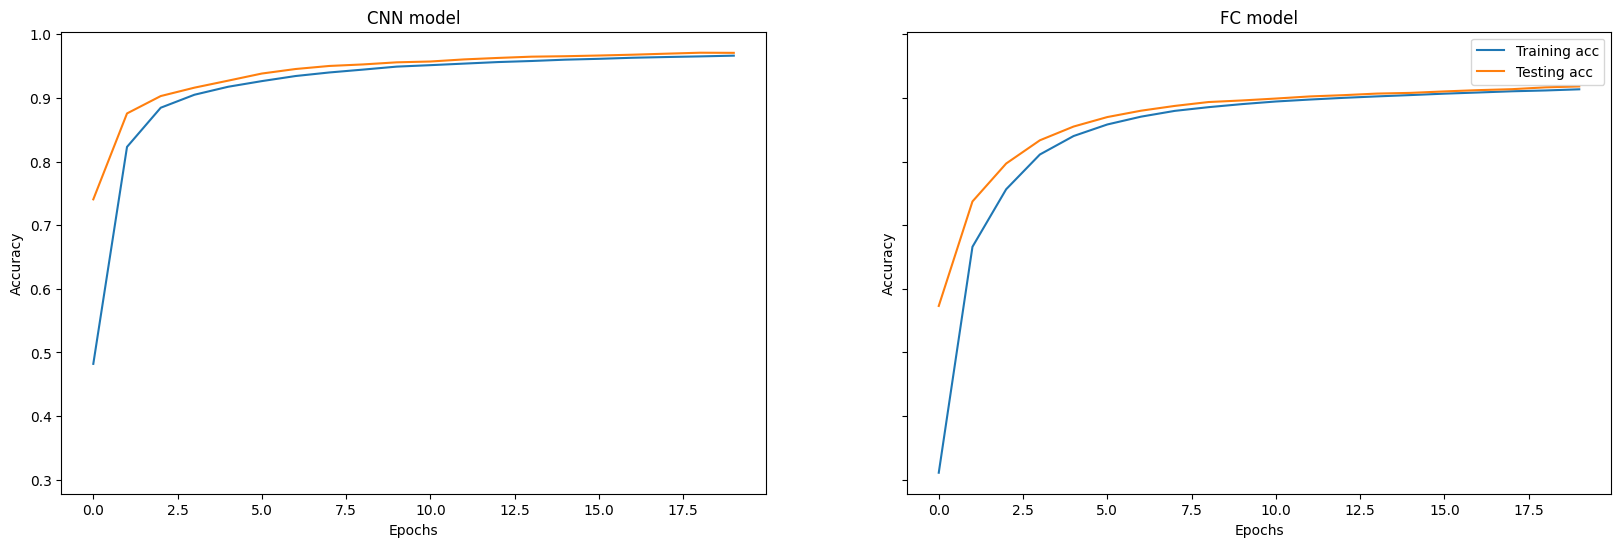

In [19]:
# TODO: visualize the history
# create 2 subplots for cnn and fc model
fig, axs = plt.subplots(1, 2, figsize=(20, 6), sharey=True)
# CNN Model
axs[0].plot([row[0] for row in history_cnn.values()],label="Training acc")
axs[0].plot([row[1] for row in history_cnn.values()],label="Testing acc")
axs[0].set_title("CNN model")
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Accuracy")
# FC Model
axs[1].plot([row[0] for row in history_fc.values()],label="Training acc")
axs[1].plot([row[1] for row in history_fc.values()],label="Testing acc")
axs[1].set_title("FC model")
axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("Accuracy")
# show charts
plt.legend()
plt.show()

- Highly recommend you go play around with the parameters of models and re-implement 2 models using `TensorFlow` using Colab